In [152]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import csv
import keras
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU

In [153]:
with open("UROP_s2.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    open_price = []
    close_price = []
    high_price = []
    low_price = []
    volume = []
    ma_15days = []
    rsi = []
    daily_return = []
    macd = []
    signal = []
    for row in csv_reader:
        open_price.append(row[3])
        close_price.append(row[2])
        high_price.append(row[4])
        low_price.append(row[5])
        volume.append(row[7])
        daily_return.append(row[9])
        ma_15days.append(row[16])
        rsi.append(row[17])
        macd.append(row[24])
        signal.append(row[25])
    daily_return[0] = 0
    for i in range(15):
        ma_15days[i] = 0
        rsi[i] = 0
    for i in range(25):
        macd[i] = 0
    for i in range(33):
        signal[i] = 0
    for i in range(len(open_price)):
        open_price[i] = float(open_price[i])
        close_price[i] = float(close_price[i])
        high_price[i] = float(high_price[i])
        low_price[i] = float(low_price[i])
        volume[i] = float(volume[i])
        daily_return[i] = float(daily_return[i])
        ma_15days[i] = float(ma_15days[i])
        rsi[i] = float(rsi[i])
        macd[i] = float(macd[i])
        signal[i] = float(signal[i])
print(close_price[0])

1.045142857


In [154]:
return_level = []
for i in daily_return:
    if i >= 0.02:
        return_level.append(2)
    elif i >= 0.005:
        return_level.append(1)
    elif i > -0.005:
        return_level.append(0)
    elif i > -0.02:
        return_level.append(-1)
    else :
        return_level.append(-2)

In [155]:
training_sets = []
training_label = []
for i in range(15, 315):
    training_label.append(return_level[i+1])
    temp_list = []
    #for j in range(5):
     #   temp_list.append(open_price[i+j-4])
      #  temp_list.append(close_price[i+j-4])
       # temp_list.append(high_price[i+j-4])
        #temp_list.append(low_price[i+j-4])
    #temp_list.append(ma_15days[i])
    temp_list.append(rsi[i])
    #temp_list.append(volume[i])
    temp_list.append(macd[i])
    temp_list.append(signal[i])
    training_sets.append(temp_list)

In [156]:
testing_sets = []
testing_label = []
for i in range(315, 900):
    testing_label.append(return_level[i+1])
    temp_list = []
    #for j in range(5):
     #   temp_list.append(open_price[i+j-4])
      #  temp_list.append(close_price[i+j-4])
       # temp_list.append(high_price[i+j-4])
        #temp_list.append(low_price[i+j-4])
    #temp_list.append(ma_15days[i])
    temp_list.append(rsi[i])
    #temp_list.append(volume[i])
    temp_list.append(macd[i])
    temp_list.append(signal[i])
    testing_sets.append(temp_list)

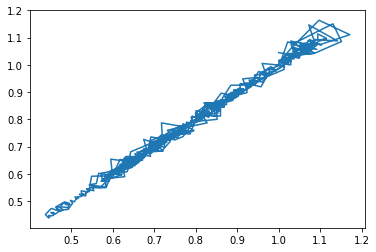

In [157]:
plt.plot(open_price,close_price)

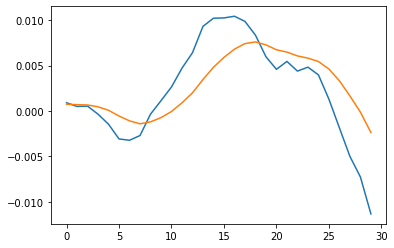

In [158]:
plt.plot(macd[50:80])
plt.plot(signal[50:80])

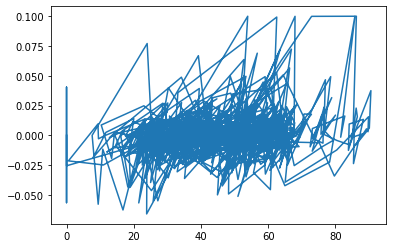

In [159]:
plt.plot(rsi,daily_return)

(array([  9.,  20., 111., 365., 310.,  75.,  20.,   5.,   5.,   6.]),
 array([-0.066044 , -0.0494396, -0.0328352, -0.0162308,  0.0003736,
         0.016978 ,  0.0335824,  0.0501868,  0.0667912,  0.0833956,
         0.1      ]),
 <a list of 10 Patch objects>)

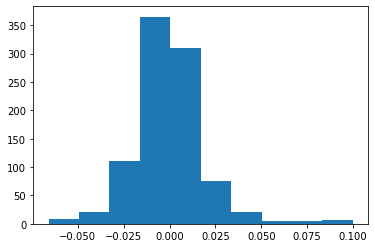

In [160]:
plt.hist(daily_return, bins = 10)

(array([107., 262., 264., 207.,  86.]),
 array([-2. , -1.2, -0.4,  0.4,  1.2,  2. ]),
 <a list of 5 Patch objects>)

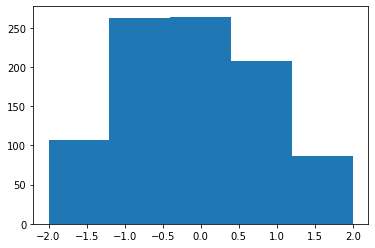

In [161]:
plt.hist(return_level, bins = 5)

In [162]:
x_train = np.array(training_sets)
x_test = np.array(testing_sets)
training_label = np.array(training_label)
y_train = keras.utils.to_categorical(training_label, num_classes=5)
y_test = keras.utils.to_categorical(testing_label, num_classes=5)
testing_label = np.array(testing_label)

In [15]:
from keras.models import Sequential
def make_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10))
    model.add(LeakyReLU(0.1))
    model.add(Dense(5))
    model.add(Activation("softmax"))
    return model

In [16]:
#keras.clear_session()
model = make_model()
#model.summary()

In [17]:
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.Adam(learning_rate=0.001), # for SGD
    metrics=['accuracy']
)

In [ ]:
model.fit(
    x_train, y_train,  # prepared data
    epochs=5000,
    #callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               #LrHistory(), 
               #keras_utils.TqdmProgressCallback(),
               #keras_utils.ModelSaveCallback(model_filename)],
    validation_data=(x_test, y_test),
    shuffle=True,
    #verbose=0,
    #initial_epoch=last_finished_epoch or 0
)

Epoch 1/5000
10/10 [==============================] - 0s 17ms/step - loss: 13.3339 - accuracy: 0.2800 - val_loss: 12.6232 - val_accuracy: 0.2855
Epoch 2/5000
10/10 [==============================] - 0s 3ms/step - loss: 12.4119 - accuracy: 0.2800 - val_loss: 11.7731 - val_accuracy: 0.2855
Epoch 3/5000
10/10 [==============================] - 0s 4ms/step - loss: 11.5297 - accuracy: 0.2800 - val_loss: 10.9356 - val_accuracy: 0.2855
Epoch 4/5000
10/10 [==============================] - 0s 4ms/step - loss: 10.6547 - accuracy: 0.2800 - val_loss: 10.1165 - val_accuracy: 0.2855
Epoch 5/5000
10/10 [==============================] - 0s 3ms/step - loss: 9.8038 - accuracy: 0.2800 - val_loss: 9.3209 - val_accuracy: 0.2855
Epoch 6/5000
10/10 [==============================] - 0s 4ms/step - loss: 8.9704 - accuracy: 0.2800 - val_loss: 8.5370 - val_accuracy: 0.2855
Epoch 7/5000
10/10 [==============================] - 0s 3ms/step - loss: 8.1015 - accuracy: 0.2800 - val_loss: 7.5745 - val_accuracy: 0.28

In [207]:
training_sets = []
training_label = []
Close = [[], [], [], [], []] #5 lists for 5 days closing prices
MA15 = [[], [], [], [], []]
RSI = [[], [], [], [], []]
Vol = [[], [], [], [], []]
MACD = [[], [], [], [], []]
Sig = [[], [], [], [], []]
for i in range(34, 310):
    training_label.append(return_level[i+1])
    for j in range(5):
        #Open.append(open_price[i+j-4])
        Close[j].append(float(close_price[i+j-4]))
        #High_list.append(high_price[i+j-4])
        #_list.append(low_price[i+j-4])
        MA15[j].append(float(ma_15days[i+j-4]))
        RSI[j].append(float(rsi[i+j-4]))
        Vol[j].append(float(volume[i+j-4]))
        MACD[j].append(float(macd[i+j-4]))
        Sig[j].append(float(signal[i+j-4]))
for j in range(5):
    training_sets.append(Close[j])
    training_sets.append(MA15[j])
    training_sets.append(RSI[j])
    training_sets.append(Vol[j])
    training_sets.append(MACD[j])
    training_sets.append(Sig[j])
    #print(Close[2])
training_sets = np.array(training_sets)
training_label = np.array(training_label)

In [229]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
def softmax(X):
    X_exp = np.exp(X)
    partition = np.sum(X_exp, axis=1,keepdims=True)
    return X_exp/partition

In [230]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_h = 5 # it is the number of neurons in the hidden unit
    n_y = Y.shape[0]
    return (n_x,n_h,n_y)

In [231]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h,n_x)*0.01
    W2 = np.random.randn(n_y,n_h)
    b1 = np.zeros((n_h,1))
    b2 = np.zeros((n_y,1))
    parameters = { "W1": W1,"W2": W2,"b1": b1,"b2": b2 }
    return parameters

In [232]:
def forward_propagation(X,parameters):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1":Z1, "Z2":Z2, "A1":A1, "A2":A2}
    return A2, cache

In [243]:
def cost(A2, Y, parameters):
    #compute cost using cross-entropy
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost = -1/m*np.sum(logprobs)
    cost = float(np.squeeze(cost))
    
    return cost

In [256]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1/m*np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims = True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = 1/m*np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1":dW1, "db1":db1, "dW2":dW2, "db2":db2}
    
    return grads

In [257]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [265]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):    
    np.random.seed(1)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        costs = cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 0.01)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, costs))
    return parameters

In [266]:
#training_sets.shape = [training_sets.shape[0],6]
#training_sets[training_sets.shape[0]-2]
#raining_sets.shape
training_label.shape = [training_label.shape[0],1]
parameters = nn_model(training_sets, training_label, 5, num_iterations=10000, print_cost=True)
training_label.shape

Cost after iteration 0: 81572.994308


<ipython-input-243-518f5415d1cb>:4: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)


Cost after iteration 1000: -inf
Cost after iteration 2000: -inf
Cost after iteration 3000: -inf
Cost after iteration 4000: -inf
Cost after iteration 5000: -inf
Cost after iteration 6000: -inf
Cost after iteration 7000: -inf


<ipython-input-229-ee44dafff6d9>:2: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


Cost after iteration 8000: -inf
Cost after iteration 9000: -inf


(276, 1)